Welcome to the initial draft version of the jupyter notebook i'm writing for fulfilment of this project. This project is the famous Kaggle project related to applying ML techniques on the Titanic dataset.

Author - Aausuman Deep

Github - www.github.com/aausuman

Date - 15 November, 2021

Time Initiated - 23:15

In [10]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib as plt

In [11]:
# Reading in the data
training_set = pd.read_csv("/Users/aausumandeep/Documents/Gits/Titanic/titanic_data/train.csv")
testing_set = pd.read_csv("/Users/aausumandeep/Documents/Gits/Titanic/titanic_data/test.csv")

# Creating a new column for the prediction values later
testing_set["Survived"] = 0

# Changing NaN values in 'Cabin' feature to 0
training_set['Cabin'] = training_set['Cabin'].fillna(0)
testing_set['Cabin'] = testing_set['Cabin'].fillna(0)

In [12]:
# Checking the defined length of the two datasets
print(len(training_set))
print(len(testing_set))

891
418


In [13]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [14]:
testing_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0


<AxesSubplot:xlabel='Pclass'>

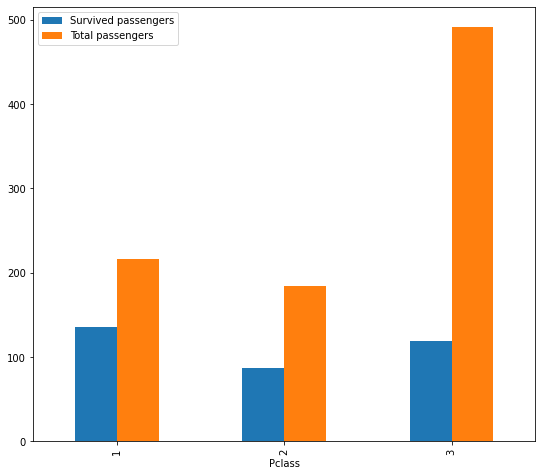

In [17]:
# Let's analyse the percentage of survivors on the basis of their passenger class

total_count = training_set.groupby(['Pclass'])['Pclass'].count().reset_index(name='Total passengers')
survived_count = training_set.groupby('Pclass')['Survived'].apply(lambda x: x[x == 1].count()).reset_index(name='Survived passengers')
analysis_1 = pd.concat([total_count, survived_count['Survived passengers']], axis=1)
analysis_1.plot(x="Pclass", y=["Survived passengers", "Total passengers"], kind="bar",figsize=(9,8))

